Las distintas columnas que aparecen corresponden a: 
* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **Salary**: a predecir

# 1. Preparación de Datos

In [2]:
# Librerias
import numpy as np  # Trabajar con matrices
import pandas as pd # Trabajar con ccsv, tablas, como si fueran SQL

import matplotlib.pyplot as plt # para visualizaciones
import seaborn as sns           # visualizaciones más elegantes.

import scipy.stats as stats     # Calculos estadisticos que no proporciona numpy

In [3]:
names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

In [4]:
# Carga el dataset
dataset_mat = pd.read_csv('adult.data.txt', header = None) # Carga el archivo en un dataframe
dataset_test = pd.read_csv('adult.test.txt', header = None, skiprows = 1) # Carga el archivo en un dataframe
dataset_mat.columns = names
dataset_test.columns = names

# Reemplazar cadena de salario
#dataset_mat.salary = dataset_mat.salary.replace({" <=50K": 0, " >50K": 1})
#dataset_mat.salary

# Visualizar
dataset_mat.head() #muestra las 5 primeras lineas datos

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset_mat.columns #ver las columnas del frame

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [6]:
dataset_mat.info() # Estructura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Llena los valores malos y pérdidos

In [7]:
dataset_mat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
dataset_mat.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [9]:
# Cuenta los valores extraños en las columnas
for col in dataset_mat.columns:
    if dataset_mat[col].dtype == object:
        print(col, dataset_mat[col].str.contains(' \?').sum())
        
# Cuenta los valores extraños en las columnas
for col in dataset_test.columns:
    if dataset_test[col].dtype == object:
        print(col, dataset_test[col].str.contains(' \?').sum())        

workclass 1836
education 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
native-country 583
salary 0
workclass 963
education 0
marital-status 0
occupation 966
relationship 0
race 0
sex 0
native-country 274
salary 0


In [10]:
# Define una variable con las columnas con valores extraños
columns_with_na_vals = ['workclass', 'occupation', 'native-country']

In [11]:
# Reemplazar los valores extraños
for col in columns_with_na_vals:
    dataset_mat[col] = (dataset_mat[col].replace(to_replace = ' ?', value = np.nan))
    
for col in columns_with_na_vals:
    dataset_test[col] = (dataset_test[col].replace(to_replace = ' ?', value = np.nan))    
    
# Corrobora la no existencia de valores extraños
for col in dataset_mat.columns:
    if dataset_mat[col].dtype == object:
        print(col, dataset_mat[col].str.contains(' \?').sum())
        
for col in dataset_test.columns:
    if dataset_test[col].dtype == object:
        print(col, dataset_test[col].str.contains(' \?').sum())        

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
salary 0
workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
salary 0


In [12]:
# Borra valor impropios
dataset_mat = dataset_mat.dropna()
dataset_test = dataset_test.dropna()
dataset_mat.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [13]:
# Chequear los tipos de datos
pd.DataFrame([dataset_mat.dtypes, dataset_test.dtypes], index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education-num,int64,int64
marital-status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [14]:
dataset_mat_stats_df = dataset_mat.describe().T
dataset_mat_stats_df

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


In [15]:
# Calculamos la asimetría
skew_values = list()
for num_col in dataset_mat_stats_df.index:
    num_col_skew = stats.skew(dataset_mat[num_col])
    skew_values.append(num_col_skew)
dataset_mat_stats_df['skew'] = skew_values
dataset_mat_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0,0.530201
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0,1.459147
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0,-0.305363
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0,11.902090
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0,4.526155
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0,0.330853


# Graficamos las distribuciones de las features numéricas no categóricas

D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

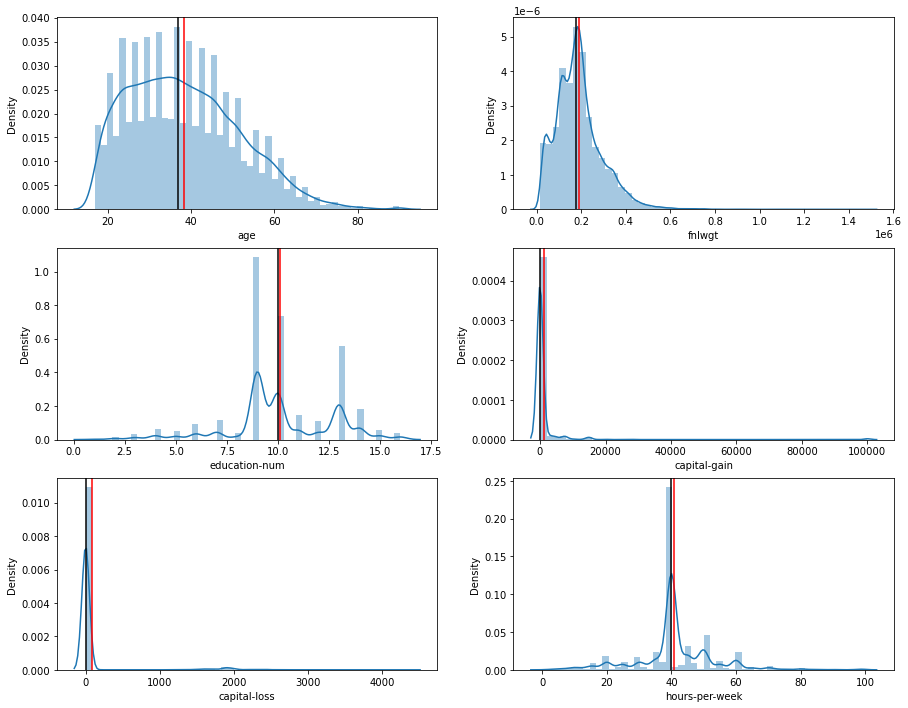

In [16]:
# Histograma para representar la evolución de las variables
fig = plt.figure(figsize=(15,12))

for i, num_col in enumerate(dataset_mat_stats_df.index):
    fig.add_subplot(3,2,1+i)
    sns.distplot(dataset_mat[num_col])
    
    mean_value = dataset_mat[num_col].mean()  # Media
    plt.axvline(mean_value, c='red')
    
    median_value = dataset_mat[num_col].median() # Mediana
    plt.axvline(median_value, c='black')

# Grafica features categóricas

In [17]:
num_features_index = dataset_mat_stats_df.index

In [18]:
num_features_index, dataset_mat.columns

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'salary'],
       dtype='object'))

In [19]:
# Carga en una lista las variables categoricas
cat_features_list = [col for col in dataset_mat.columns if col not in num_features_index]
cat_features_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


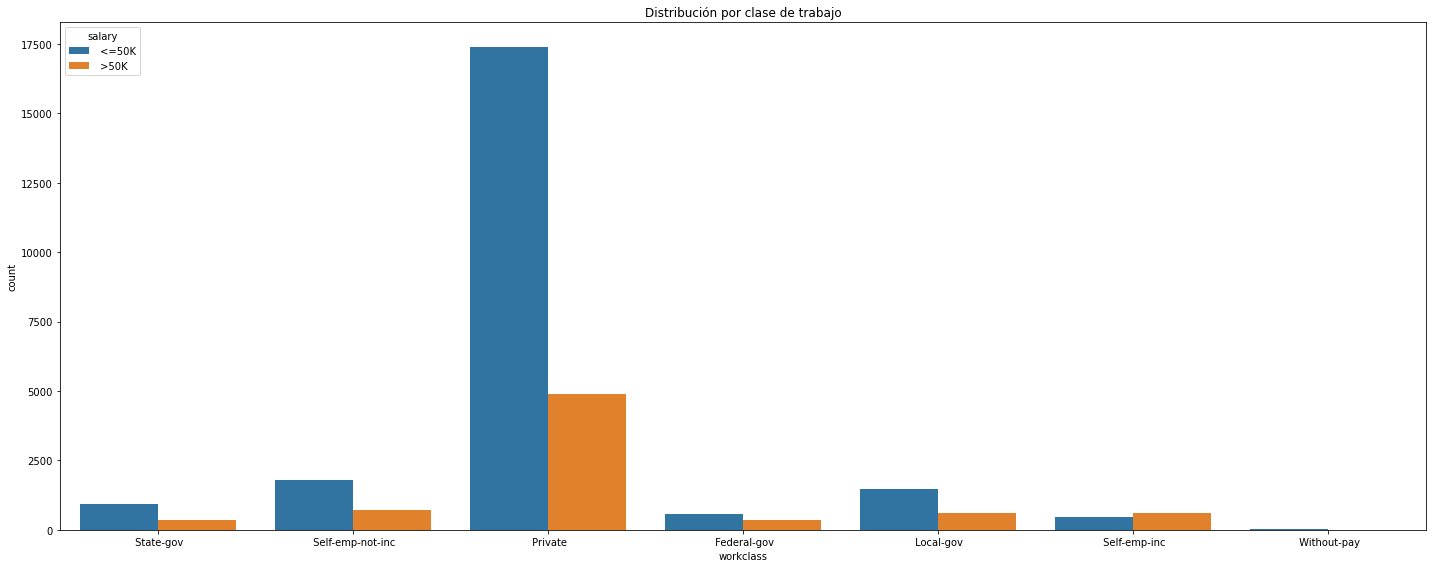

In [20]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('workclass', hue = 'salary', data = dataset_mat)
plt.title("Distribución por clase de trabajo")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


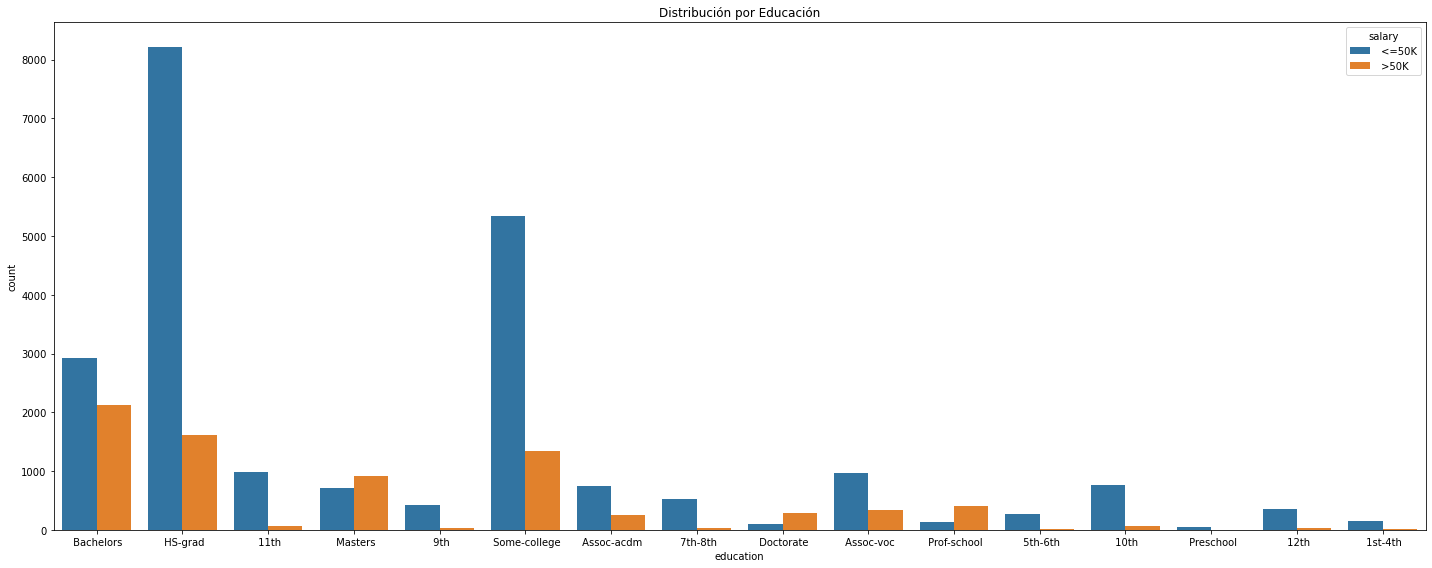

In [21]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('education', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Educación")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


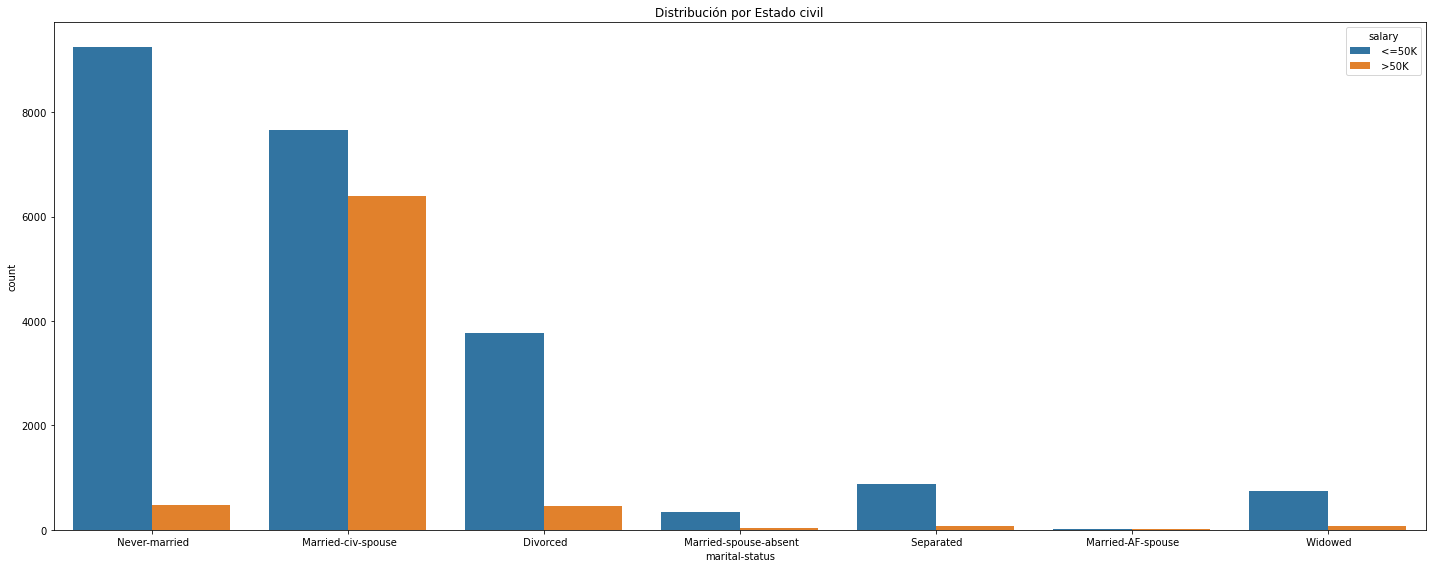

In [22]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('marital-status', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Estado civil")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


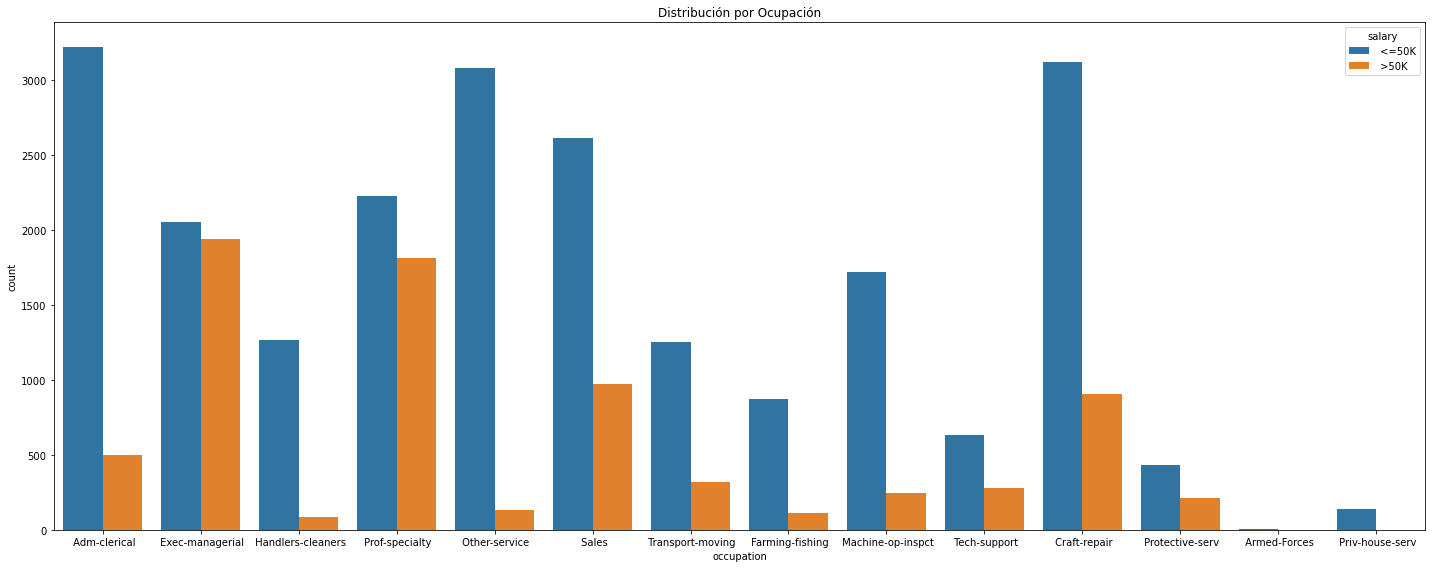

In [23]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('occupation', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ocupación")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


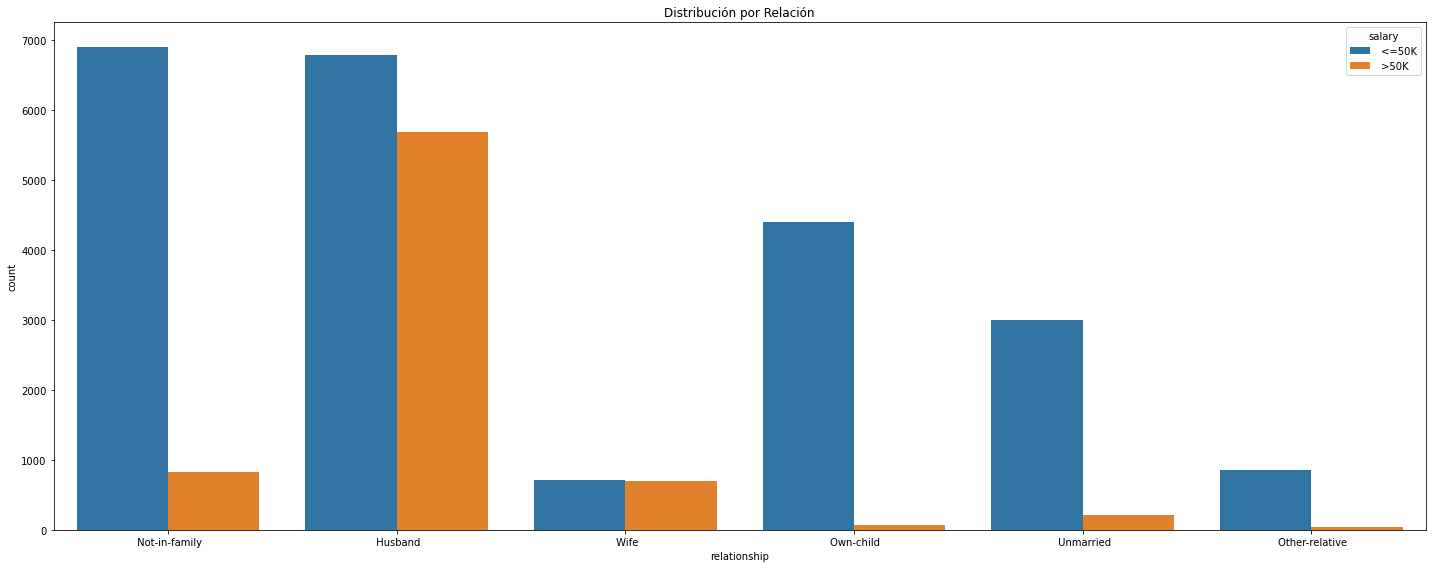

In [24]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('relationship', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Relación")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


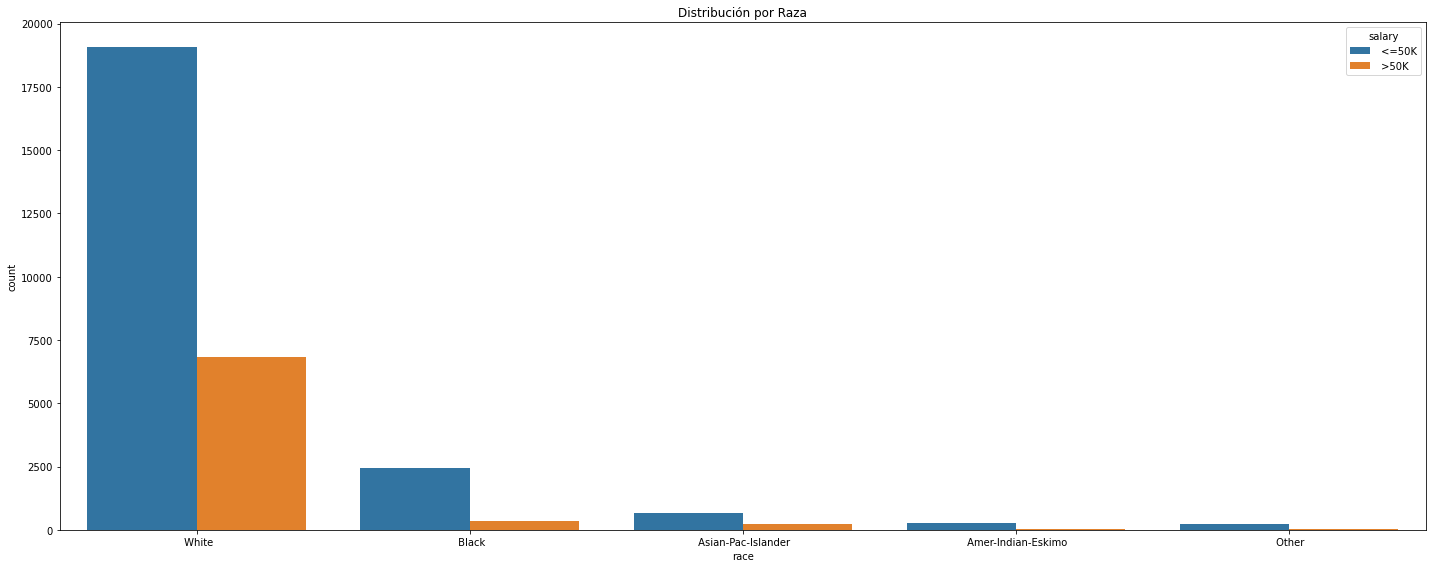

In [25]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('race', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Raza")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


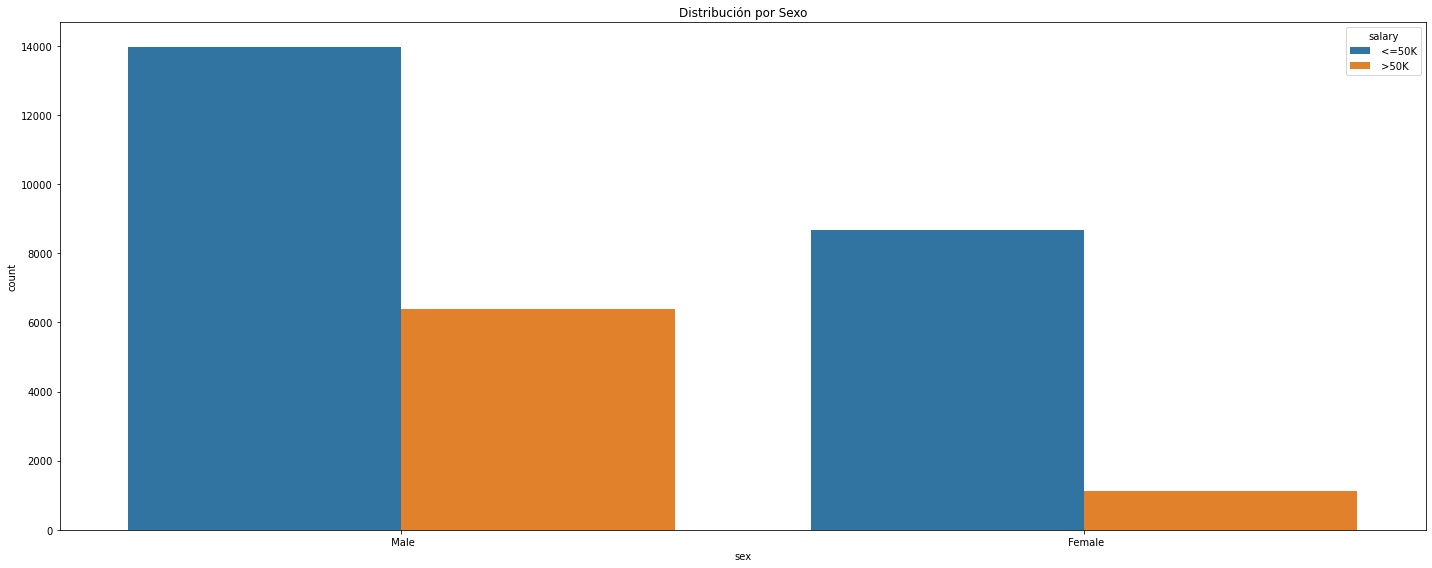

In [26]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('sex', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Sexo")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


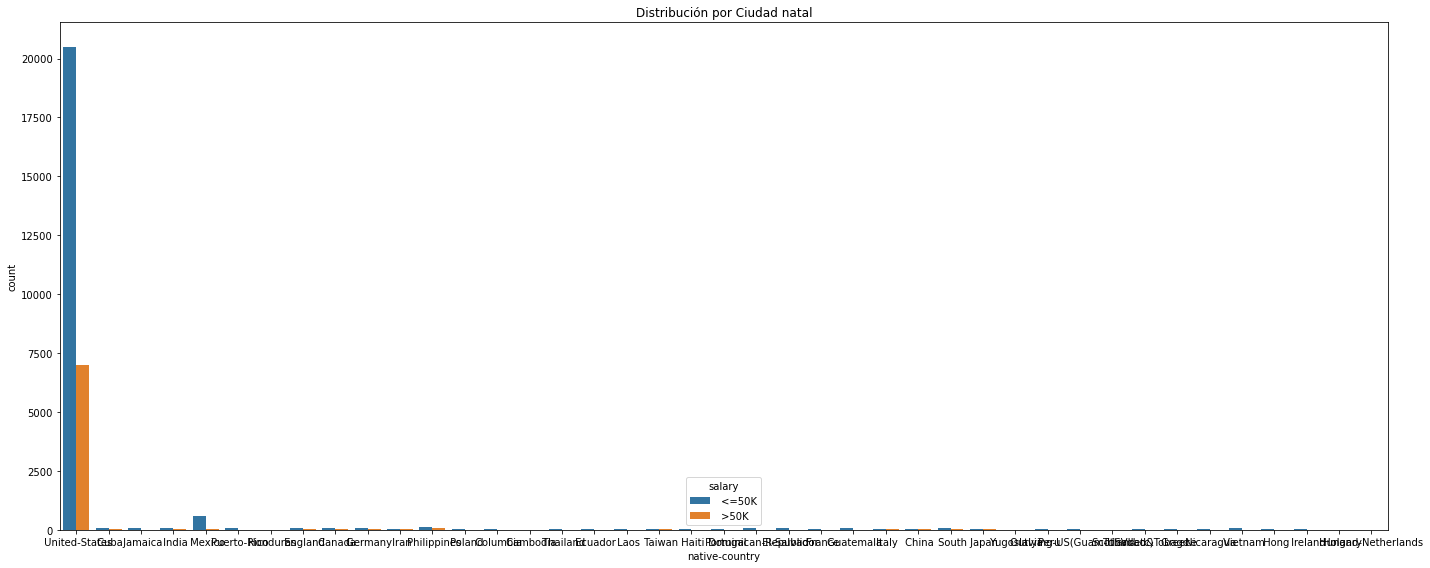

In [27]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('native-country', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ciudad natal")
plt.tight_layout()

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


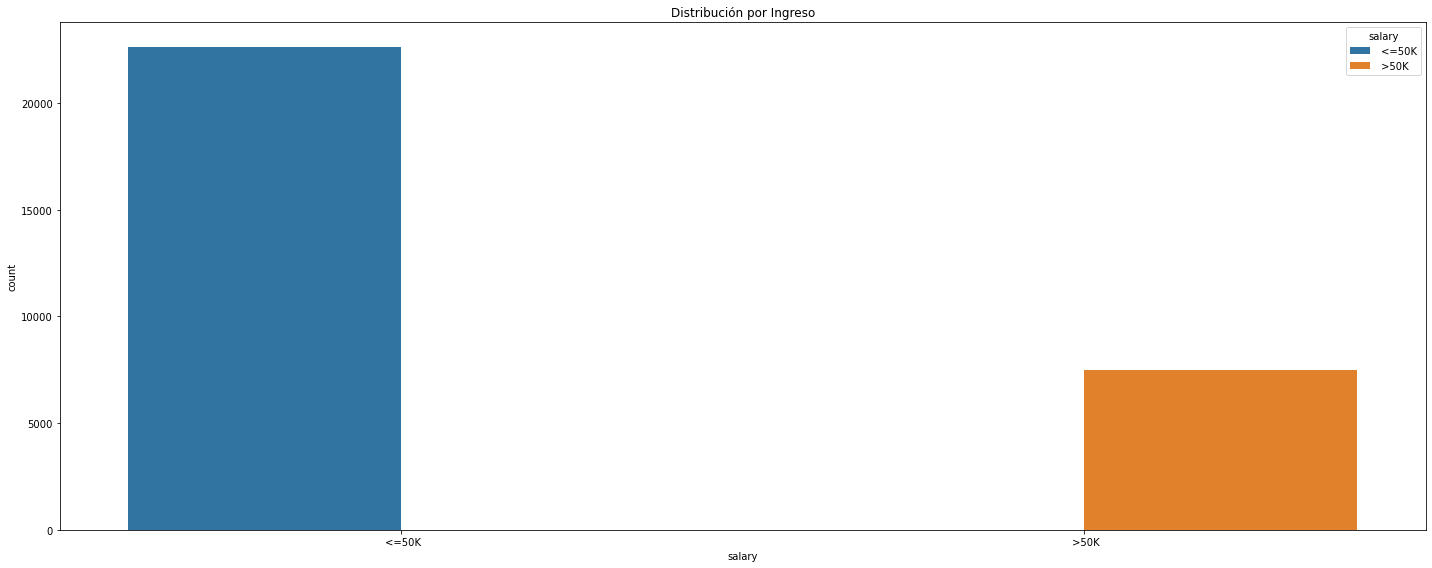

In [28]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('salary', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ingreso")
plt.tight_layout()

In [29]:
# Descripcion estadística de los datos
dataset_mat.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


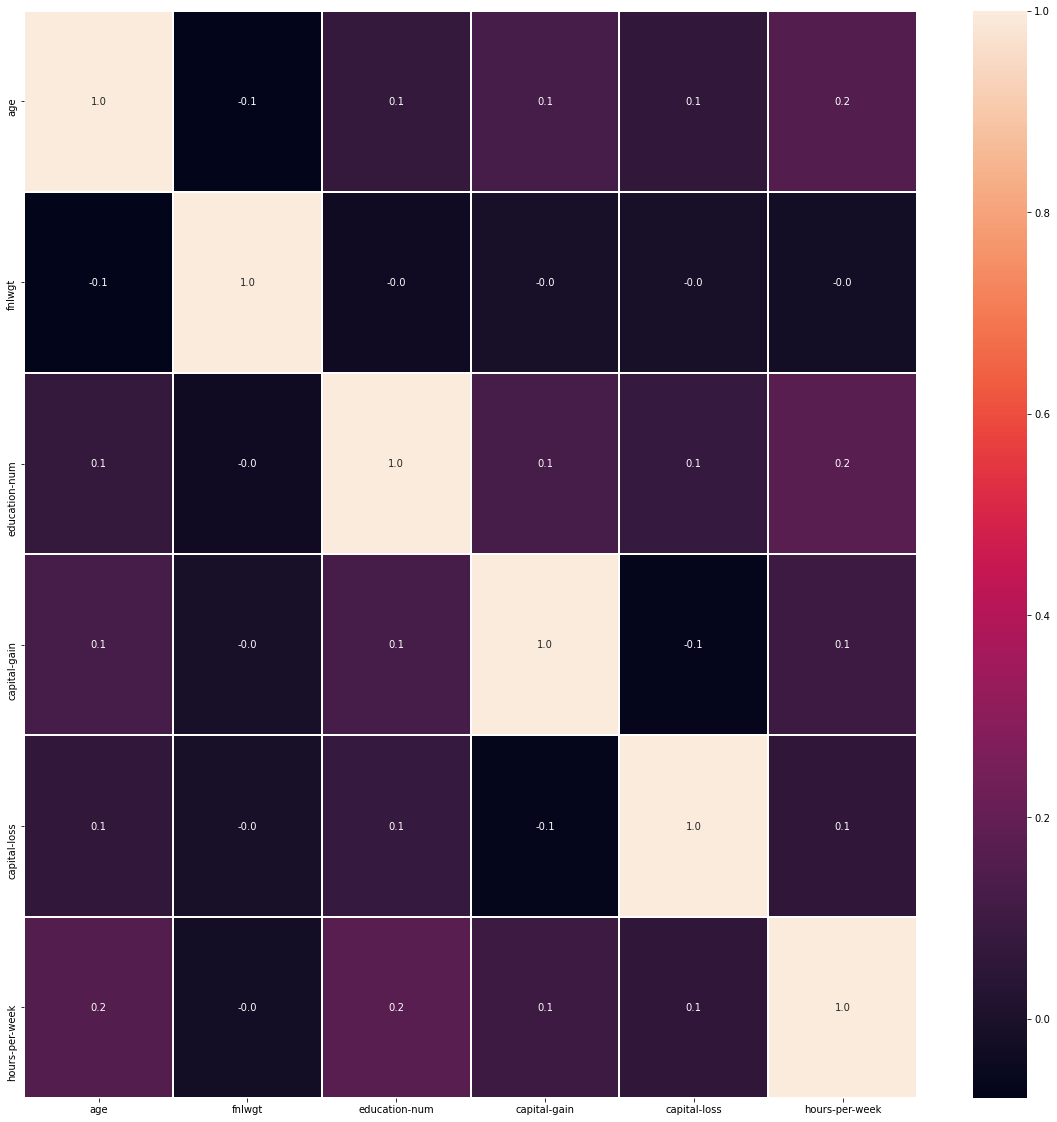

In [30]:
# Correlación entre variables no categoricas
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset_mat.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

In [31]:
dataset_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


In [32]:
list_mult_not_ord = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship','race','sex','native-country'] #Lista de variable categoricas o ordinales
#list_cat_not_ord = list_binary + list_mult_not_ord 

In [33]:
# Encoding numerico de las variables para trabajar en el modelo
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
# Las variables que aparecen como texto aparecen como object
#dataset_mat.info() #displiega informacion de la columnas dle dataframe
# copiamos en un sub-dataframe los registros cuyo tipo = object
obj_df = dataset_mat.select_dtypes(include=['object']).copy()
#print (obj_df.columns) # despliega las columnas creado en la línea anterior.

from sklearn.preprocessing import LabelEncoder # Esta libreria con proprocessing permite expresar los valores texto en numeros
lb_encoder = LabelEncoder() # creamos un objeto que hará el encoding

# Iterar por las columnas del dataframe
for col in obj_df.columns:
    dataset_mat[col] = lb_encoder.fit_transform(dataset_mat[col]) 
# Sustituimos en el dataframe origimal el valor de texto
# por el valor numerico con fit_transform

# Lo hacemos para el grupo de test
obj_test = dataset_test.select_dtypes(include=['object']).copy()

for col in obj_test.columns:
    dataset_test[col] = lb_encoder.fit_transform(dataset_test[col]) 

dataset_mat.head()
dataset_mat.isnull().sum() #Permite chequear si hay alguna variable con nulos.
dataset_test.isnull().sum() #Permite chequear si hay alguna variable con nulos.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

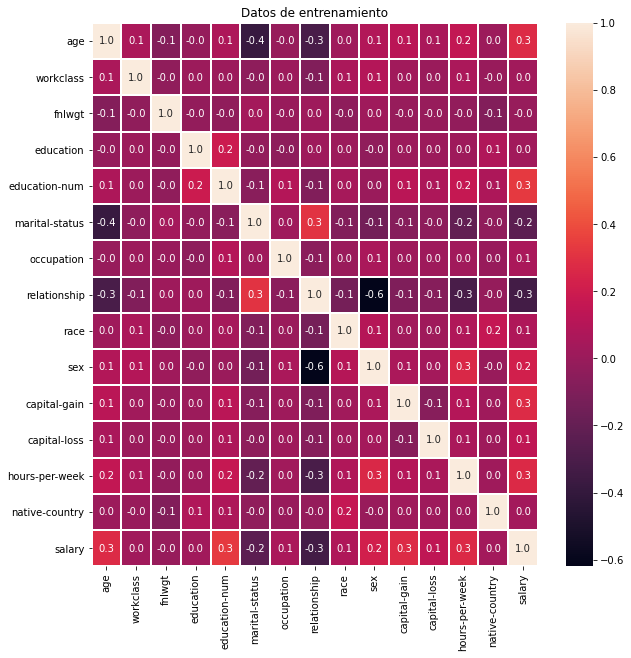

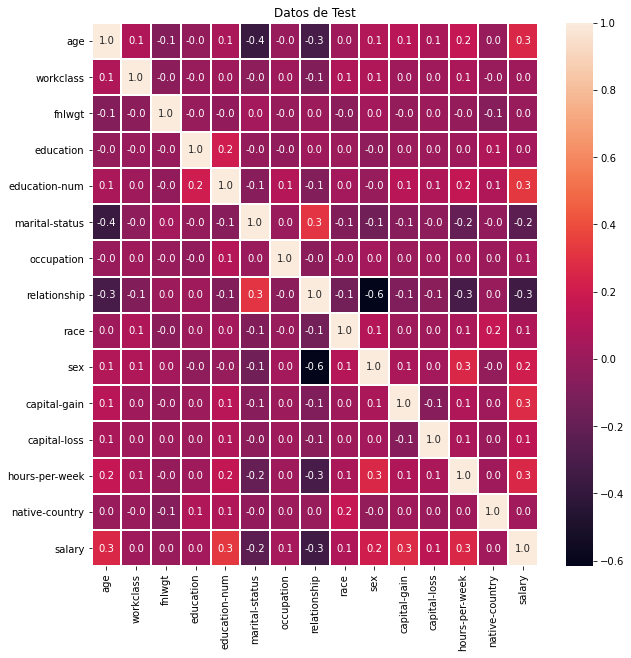

In [34]:
# Correlación entre todas las variables
f,ax = plt.subplots(figsize=(10,10))
# Train
sns.heatmap(dataset_mat.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
#plt.subplot(2, 2, 1) 
plt.title("Datos de entrenamiento") 
plt.show()

f,ax = plt.subplots(figsize=(10,10))
# Test
#plt.subplot(2, 2, 2) 
sns.heatmap(dataset_test.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.title("Datos de Test") 
plt.show()

<AxesSubplot:ylabel='capital-loss'>

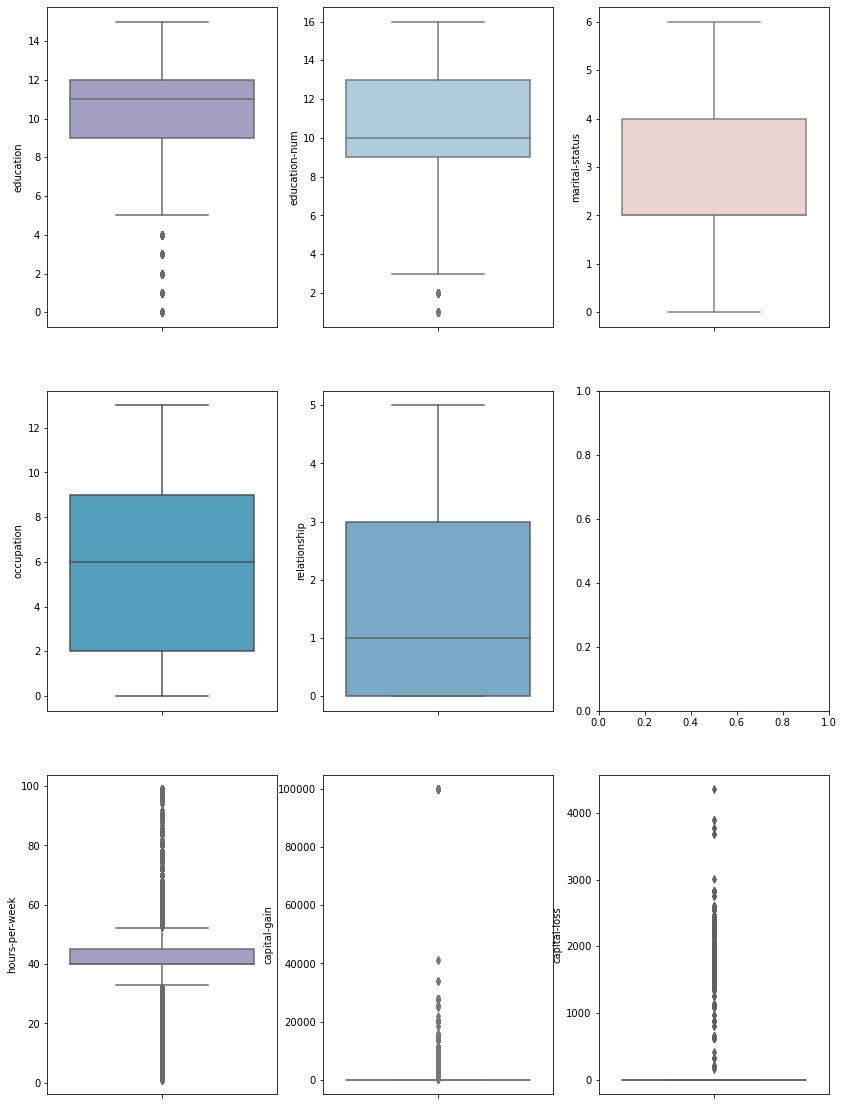

In [35]:
# Boxplots - Visualizar anomalias. Cuartiles, y cuales e salen de los rangos
f, ax = plt.subplots(3, 3, figsize=(14,20))

#sns.boxplot(y="salary", data=dataset_mat, orient="v", ax=ax[0][0], palette="Reds")
#Usando "x" daba problema
#sns.boxplot(y= "workclass", data=dataset_mat, orient='v' , ax=ax[0][1], palette="Blues") 
#sns.boxplot(y= "fnlwgt", data=dataset_mat, orient='v' , ax=ax[0][2], palette="GnBu_d") 
sns.boxplot(y= "education", data=dataset_mat, orient='v' , ax=ax[0][0], palette="Purples") 
sns.boxplot(y= "education-num", data=dataset_mat, orient='v' , ax=ax[0][1], palette="Paired") 
sns.boxplot(y= "marital-status", data=dataset_mat, orient='v' , ax=ax[0][2], palette=sns.cubehelix_palette(8)) 
sns.boxplot(y= "occupation", data=dataset_mat, orient='v' , ax=ax[1][0], palette="GnBu_d") 
sns.boxplot(y= "relationship", data=dataset_mat, orient='v' , ax=ax[1][1], palette="Blues") 
#sns.boxplot(y= "race", data=dataset_mat, orient='v' , ax=ax[2][2], palette="Reds") 
sns.boxplot(y= "hours-per-week", data=dataset_mat, orient='v' , ax=ax[2][0], palette="Purples") 
sns.boxplot(y= "capital-gain", data=dataset_mat, orient='v' , ax=ax[2][1], palette="Paired") 
sns.boxplot(y= "capital-loss", data=dataset_mat, orient='v' , ax=ax[2][2], palette="Blues")
#Estos graficos me permiten identicar las anomalias, aquellos puntos que quedan fuera del gráfico.

In [132]:
dataset_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   sex             30162 non-null  int32
 10  capital-gain    30162 non-null  int64
 11  capital-loss    30162 non-null  int64
 12  hours-per-week  30162 non-null  int64
 13  native-country  30162 non-null  int32
 14  salary          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB


# 3. EDA (bivariante)

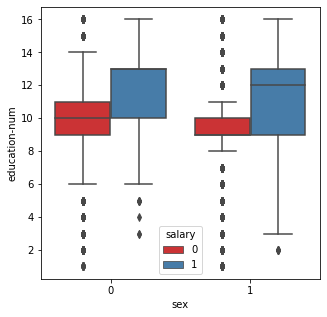

In [36]:
# Boxplot de dos categorias
f,ax = plt.subplots(figsize=(5,5)) 
sns.boxplot(x="sex",y="education-num", hue="salary",data=dataset_mat, palette="Set1") 
plt.show()

In [48]:
dataset_mat.groupby('education').salary.nunique().reset_index()

,education,salary
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,2
8,8,2
9,9,2


In [37]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [38]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia education
x = dataset_mat['education']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de educacion en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de educacion en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0157    0.9 -0.0799  0.0486  False
     0      2    0.005    0.9 -0.0808  0.0907  False
     0      3  -0.0322    0.9 -0.1543  0.0898  False
     0      4  -0.0303    0.9 -0.1247  0.0641  False
     0      5  -0.0091    0.9 -0.0848  0.0666  False
     0      6   -0.017    0.9 -0.0976  0.0636  False
     0      7    0.182  0.001  0.1172  0.2468   True
     0      8   0.1912  0.001  0.1298  0.2527   True
     0      9   0.3495  0.001  0.2976  0.4014   True
     0     10   0.6747  0.001  0.5888  0.7606   True
     0     11   0.0924  0.001  0.0423  0.1425   True
     0     12   0.4923  0.001  0.4332  0.5513   True
     0     13   -0.072    0.9  -0.283  0.1391  False
     0     14   0.6771  0.001  0.6008  0.7534   True
     0     15   0.1281  0.001  0.0771  0.1791   True
   

In [39]:
# Cuales pueden influir en el tipo de salario.

# Influencia de tipo de trabajo
x = dataset_mat['workclass']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tipo de trabajo en tipo de salario")
print (Results)

Influencia de tipo de trabajo en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0924  0.001 -0.1419  -0.043   True
     0      2  -0.1683  0.001 -0.2101 -0.1264   True
     0      3   0.1716  0.001  0.1155  0.2277   True
     0      4  -0.1013  0.001 -0.1494 -0.0533   True
     0      5  -0.1181  0.001 -0.1721 -0.0641   True
     0      6  -0.3871 0.0133 -0.7257 -0.0484   True
     1      2  -0.0758  0.001 -0.1048 -0.0469   True
     1      3    0.264  0.001  0.2167  0.3113   True
     1      4  -0.0089    0.9 -0.0463  0.0285  False
     1      5  -0.0257  0.605 -0.0704  0.0191  False
     1      6  -0.2946 0.1332  -0.632  0.0427  False
     2      3   0.3399  0.001  0.3006  0.3792   True
     2      4   0.0669  0.001  0.0404  0.0935   True
     2      5   0.0502  0.001   0.014  0.0863   True
     2      6  -0.2188 0.4696 -0.5551  0.1175  Fal

In [40]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia education
x = dataset_mat['education-num']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de educacion en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de educacion en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0397    0.9 -0.1944 0.2738  False
     1      3   0.0417    0.9 -0.1793 0.2626  False
     1      4   0.0628    0.9 -0.1508 0.2764  False
     1      5   0.0549    0.9 -0.1604 0.2703  False
     1      6    0.072    0.9 -0.1391  0.283  False
     1      7   0.0563    0.9 -0.1535 0.2661  False
     1      8   0.0769    0.9 -0.1405 0.2943  False
     1      9   0.1643  0.309 -0.0416 0.3703  False
     1     10   0.2001  0.069 -0.0061 0.4062  False
     1     11   0.2632 0.0017  0.0542 0.4722   True
     1     12    0.254 0.0036   0.044  0.464   True
     1     13   0.4215  0.001  0.2151 0.6279   True
     1     14   0.5642  0.001  0.3559 0.7725   True
     1     15   0.7491  0.001  0.5352 0.9629   True
     1     16   0.7467  0.001  0.5292 0.9641   True
     2      3   0.001

In [41]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia education
x = dataset_mat['marital-status']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de marital-status en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de marital-status en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.3689  0.001  0.1196  0.6183   True
     0      2   0.3477  0.001  0.3277  0.3677   True
     0      3  -0.0235    0.9 -0.0853  0.0383  False
     0      4  -0.0589  0.001   -0.08 -0.0379   True
     0      5   -0.037 0.1114 -0.0781  0.0042  False
     0      6  -0.0105    0.9 -0.0539  0.0328  False
     1      2  -0.0212    0.9 -0.2701  0.2277  False
     1      3  -0.3924  0.001 -0.6481 -0.1367   True
     1      4  -0.4279  0.001 -0.6768 -0.1789   True
     1      5  -0.4059  0.001 -0.6574 -0.1544   True
     1      6  -0.3795  0.001 -0.6313 -0.1276   True
     2      3  -0.3712  0.001 -0.4312 -0.3111   True
     2      4  -0.4066  0.001 -0.4217 -0.3916   True
     2      5  -0.3847  0.001 -0.4231 -0.3463   True
     2      6  -0.3582  0.001  -0.399 -0.3174   Tru

In [42]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia occupation
x = dataset_mat['occupation']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de occupation en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de occupation en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0227    0.9 -0.4763  0.4308  False
     0      2   0.0915  0.001  0.0606  0.1224   True
     0      3   0.3514  0.001  0.3204  0.3824   True
     0      4  -0.0176    0.9 -0.0662  0.0311  False
     0      5  -0.0724  0.001 -0.1155 -0.0292   True
     0      6  -0.0092    0.9 -0.0471  0.0287  False
     0      7  -0.0927  0.001 -0.1255   -0.06   True
     0      8  -0.1268 0.0171 -0.2427  -0.011   True
     0      9   0.3147  0.001  0.2838  0.3455   True
     0     10   0.1923  0.001  0.1342  0.2503   True
     0     11   0.1368  0.001   0.105  0.1686   True
     0     12    0.171  0.001  0.1208  0.2212   True
     0     13   0.0691  0.001  0.0282    0.11   True
     1      2   0.1142    0.9 -0.3393  0.5677  False
     1      3   0.3741 0.2414 -0.0794  0.8276  False
  

In [43]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia relationship
x = dataset_mat['relationship']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de relationship en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de relationship en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.3491  0.001  -0.365 -0.3333   True
     0      2  -0.4163  0.001 -0.4544 -0.3782   True
     0      3  -0.4413  0.001 -0.4605 -0.4222   True
     0      4  -0.3894  0.001 -0.4111 -0.3676   True
     0      5   0.0379 0.0062   0.007  0.0688   True
     1      2  -0.0672  0.001  -0.106 -0.0283   True
     1      3  -0.0922  0.001 -0.1128 -0.0716   True
     1      4  -0.0402  0.001 -0.0633 -0.0172   True
     1      5   0.3871  0.001  0.3552  0.4189   True
     2      3   -0.025 0.4857 -0.0654  0.0153  False
     2      4   0.0269 0.4381 -0.0147  0.0685  False
     2      5   0.4542  0.001  0.4072  0.5013   True
     3      4    0.052  0.001  0.0266  0.0774   True
     3      5   0.4793  0.001  0.4457  0.5128   True
     4      5   0.4273  0.001  0.3922  0.4624   True


In [44]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia race
x = dataset_mat['race']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de race en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de race en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1582  0.001  0.0785  0.2379   True
     0      2    0.011    0.9 -0.0618  0.0839  False
     0      3   -0.028    0.9 -0.1318  0.0759  False
     0      4   0.1448  0.001  0.0751  0.2146   True
     1      2  -0.1472  0.001 -0.1922 -0.1021   True
     1      3  -0.1862  0.001 -0.2728 -0.0996   True
     1      4  -0.0134 0.8863 -0.0533  0.0265  False
     2      3   -0.039 0.6534 -0.1193  0.0413  False
     2      4   0.1338  0.001  0.1105  0.1571   True
     3      4   0.1728  0.001  0.0952  0.2504   True
----------------------------------------------------


# 4. Selección de variables para el modelo

In [104]:
# Las que influyan en el tipo de salario.
# Numericas y categoricas ordinales sin influyen en la calificación final o salida
# Se tomara las multiclase, porque parece  influir.
#'sex',

# seleccionar automaticamente las variables. Se pudo haber hecho manual. #'education-num','fnlwgt',
list_cat_corrs = ['age','workclass', 'education', 'marital-status', 'occupation', 'relationship',
                  'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'] 
df_ordinal = dataset_mat[list_cat_corrs].corr()['salary'].reset_index().rename(columns={'index':'variable'})
df_ordinal = df_ordinal[~df_ordinal['variable'].isin(['salary'])] # El rabo de chancho niega, como un not
df_ordinal = df_ordinal[abs(df_ordinal['salary'])>0.21]  # Variables que tenga correlación significativamente alta > 0.21
df_ordinal
list_ordinal_chosen = list(df_ordinal['variable'].values)
list_ordinal_chosen

['age', 'relationship', 'capital-gain', 'hours-per-week']

In [105]:
# Analisis de PCA
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = dataset_test.loc[:, list_cat_corrs].values
# Separating out the target
y = dataset_test.loc[:,['salary']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#x

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
dataset_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
16276,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
16278,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0
16279,44,2,83891,9,13,0,0,3,1,1,5455,0,40,37,0


In [106]:
finalDf = pd.concat([principalDf, dataset_test[['salary']]], axis = 1)
finalDf

,PC 1,PC 2,PC 3,PC 4,salary
0,-2.199500,1.529856,-0.374636,0.246273,0.0
1,0.586233,-0.766047,-0.392484,-0.013493,0.0
2,0.710877,0.800462,0.987661,-0.836442,1.0
3,1.435511,0.800971,1.351337,1.076454,1.0
4,-1.281982,0.344330,-1.392943,-0.247047,NaN
...,...,...,...,...,...
16275,NaN,NaN,NaN,NaN,0.0
16276,NaN,NaN,NaN,NaN,0.0
16278,NaN,NaN,NaN,NaN,0.0
16279,NaN,NaN,NaN,NaN,0.0


In [97]:
# El resultado explica que las 4 PC solo contienen el 40% de la información
pca.explained_variance_ratio_

array([0.15251435, 0.09655457, 0.08217035, 0.07437522])

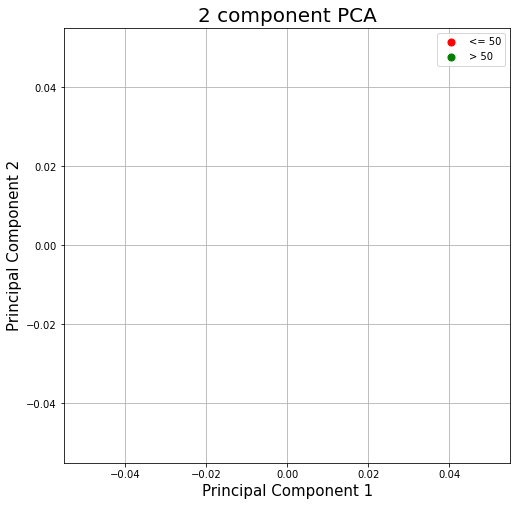

In [98]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
salarys = ['<= 50', '> 50']
colors = ['r', 'g']
for salary, color in zip(salarys,colors):
    indicesToKeep = finalDf['salary'] == salary
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(salarys)
ax.grid()

In [79]:
# seleccionar las variables binarias
df_binary = pd.DataFrame()
list_binary = ['sex']

# Se itera pr las columnas, obteniendo el contraste de hipotesis con salary y solo nos quedaremos con aquellas que rechacen la 
# hipotesis nula. Que este debajo del umbral Threshold

threshold = 0.05

for column in list_binary:
    pvalue = stats.f_oneway(dataset_mat[dataset_mat[column]==0]["salary"],
                           dataset_mat[dataset_mat[column]==1]["salary"])[1] #Segunda posición de la lista el pvalue
    
    df_binary = df_binary.append(pd.DataFrame({'variable':[column],
                                              'pvalue':[pvalue]}))
    
df_binary = df_binary[df_binary['pvalue']<=threshold]
list_binary_chosen = list(df_binary['variable'].values)
    
df_binary
list_binary_chosen

['sex']

In [80]:
list_all_chosen = list_ordinal_chosen + list_binary_chosen 
list_all_chosen

['age',
 'education-num',
 'relationship',
 'capital-gain',
 'hours-per-week',
 'sex']

# 5. Construcción del modelo

In [81]:
df_mat = dataset_mat[list_all_chosen + ['salary']] # salary es la variable de salida.. A predecir
df_mat.head()
df_test = dataset_test[list_all_chosen + ['salary']] # salary es la variable de salida.. A predecir
df_test.head()

,age,education-num,relationship,capital-gain,hours-per-week,sex,salary
0,25,7,3,0,40,1,0
1,38,9,0,0,50,1,0
2,28,12,0,0,40,1,1
3,44,10,0,7688,40,1,1
5,34,6,1,0,30,1,0


In [82]:
# Componentes principales con solo las variables elegidas
x = df_test.loc[:, list_all_chosen + ['salary']].values
# Separating out the target
y = df_test.loc[:,['salary']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-1.02900513, -1.2165628 ,  1.00610775, ..., -0.07888904,
         0.69583225, -0.57070502],
       [-0.05742253, -0.43489824, -0.88198978, ...,  0.75013125,
         0.69583225, -0.57070502],
       [-0.80479376,  0.73759862, -0.88198978, ..., -0.07888904,
         0.69583225,  1.75221867],
       ...,
       [-0.05742253,  1.1284309 , -0.88198978, ...,  0.75013125,
         0.69583225, -0.57070502],
       [ 0.39100021,  1.1284309 ,  1.00610775, ..., -0.07888904,
         0.69583225, -0.57070502],
       [-0.2816339 ,  1.1284309 , -0.88198978, ...,  1.57915155,
         0.69583225,  1.75221867]])

In [86]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])

In [87]:
finalDf = pd.concat([principalDf, dataset_test[['salary']]], axis = 1)
finalDf

,PC 1,PC 2,PC 3,PC 4,salary
0,-1.111487,-0.923837,-0.610255,0.870685,0.0
1,0.643126,-1.168377,-0.333249,0.247463,0.0
2,1.439774,0.348033,-1.009805,-0.291136,1.0
3,1.808151,0.360497,0.428045,0.514316,1.0
4,-0.671171,-1.597264,0.338343,0.890951,NaN
...,...,...,...,...,...
16275,NaN,NaN,NaN,NaN,0.0
16276,NaN,NaN,NaN,NaN,0.0
16278,NaN,NaN,NaN,NaN,0.0
16279,NaN,NaN,NaN,NaN,0.0


In [88]:
# El resultado explica que las 4 PC solo contienen el 75% de la información
pca.explained_variance_ratio_

array([0.30402605, 0.18000363, 0.13643632, 0.12528425])

In [146]:
# onehot encoding, para representar los variables categoricaas. La categoria maxima se representa con max-1 ceros
# Recuerden que son max categorias. con la combinación de un 1 en la posición, se le da al valor.
aux = pd.get_dummies(df_mat['education-num'], drop_first = True) #
aux.columns = ['education-num_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['education-num']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['relationship'], drop_first = True) #
aux.columns = ['relationship_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['relationship']) # Se descarta la columna original
df_mat.head()

aux = pd.get_dummies(df_test['education-num'], drop_first = True) #
aux.columns = ['education-num_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['education-num']) # Se descarta la columna original
aux = pd.get_dummies(df_test['relationship'], drop_first = True) #
aux.columns = ['relationship_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['relationship']) # Se descarta la columna original
df_test.head()

,age,capital-gain,hours-per-week,sex,salary,education-num_2,education-num_3,education-num_4,education-num_5,education-num_6,...,education-num_12,education-num_13,education-num_14,education-num_15,education-num_16,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5
0,25,0,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,40,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,44,7688,40,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,34,0,30,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [147]:
list_ordinal_chosen

['age', 'education-num', 'relationship', 'capital-gain', 'hours-per-week']

In [148]:
# Normalizado o Escalado de las variables numerales ordinales, las pone en valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

list_ordinal = ['age','capital-gain','hours-per-week']
scaler = MinMaxScaler()
df_mat[list_ordinal] = scaler.fit_transform(df_mat[list_ordinal]) # devuelve los valores transformados
df_mat.head()

df_test[list_ordinal] = scaler.fit_transform(df_test[list_ordinal]) # devuelve los valores transformados
df_test.head()

,age,capital-gain,hours-per-week,sex,salary,education-num_2,education-num_3,education-num_4,education-num_5,education-num_6,...,education-num_12,education-num_13,education-num_14,education-num_15,education-num_16,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5
0,0.109589,0.000000,0.397959,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.000000,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.150685,0.000000,0.397959,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.369863,0.076881,0.397959,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.232877,0.000000,0.295918,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [149]:
# Separacion en variables entrada/salida
X = df_mat.drop(columns=["salary"]).values
y = df_mat["salary"].values
Xt = df_test.drop(columns=["salary"]).values
yt = df_test["salary"].values

In [155]:
# Train/Test Split
# Con los datos del archivo de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt,yt) 

# Con datos de prueba del archivo de train aleatorios
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [156]:
#SVM (Kernel = rbf)
from sklearn.svm import SVC
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Filtered
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[2662  175]
 [ 495  433]]
precision: 0.712171052631579  recall: 0.4665948275862069  f1: 0.5638020833333334


# Fin de ejercicio

In [71]:
print(y_pred)

[0 0 0 ... 0 1 1]


In [77]:
performance = []

In [78]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [79]:
# Binary data
GNB.fit(X_train,y_train)
train_score = GNB.score(X_train,y_train)
test_score = GNB.score(X_test,y_test)
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.7106624229162523 - Test score - 0.701909687686493


In [80]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

logClassifier = LogisticRegression()

In [81]:
logClassifier.fit(X_train,y_train)
train_score = logClassifier.score(X_train,y_train)
test_score = logClassifier.score(X_test,y_test)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

LogisticRegression : Training score - 0.831857966978317 - Test score - 0.8298189775213846


In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn_scores = []

KNN : Training score - 0.894718519992043 -- Test score - 0.7875472448776606
KNN : Training score - 0.8666699820966779 -- Test score - 0.8087328426496917
KNN : Training score - 0.8566739606126915 -- Test score - 0.8147006166699821
KNN : Training score - 0.8532922220011936 -- Test score - 0.818679132683509
KNN : Training score - 0.8508553809429082 -- Test score - 0.8207678535906107
KNN : Training score - 0.8514024268947683 -- Test score - 0.8217624825939924
KNN : Training score - 0.8483190769842849 -- Test score - 0.8233538889994032
KNN : Training score - 0.847224985080565 -- Test score - 0.8236522777004177
KNN : Training score - 0.8457330415754923 -- Test score - 0.8221603341953452
KNN : Training score - 0.8436940521185597 -- Test score - 0.8240501293017705


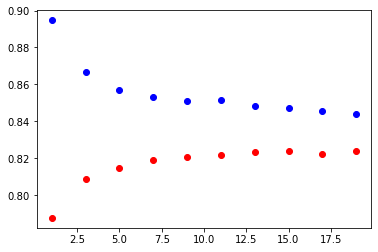

In [84]:
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn.score(X_train,y_train)

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

K Neighbors : Training score - 0.8566739606126915 - Test score - 0.8147006166699821


In [87]:
performance

[{'algorithm': 'Gaussian Naive Bayes',
  'training_score': 0.7106624229162523,
  'testing_score': 0.701909687686493},
 {'algorithm': 'LogisticRegression',
  'training_score': 0.831857966978317,
  'testing_score': 0.8298189775213846},
 {'algorithm': 'K Neighbors',
  'training_score': 0.8566739606126915,
  'testing_score': 0.8147006166699821}]

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rndTree = RandomForestClassifier()

In [90]:
rndTree.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [94]:
train_score = rndTree.score(X_train,y_train)
test_score = rndTree.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Random Forests', 'training_score':train_score, 'testing_score':test_score})

Random Forests : Training score - 0.9167992838671176 - Test score - 0.8200716132882435
